# Рубежный контроль №2

### Камалов Марат ИУ5-65Б

### Тема: Методы построения моделей машинного обучения.

### Вариант №7

Датасет: https://www.kaggle.com/mohansacharya/graduate-admissions (файл Admission_Predict_Ver1.1.csv)

In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import *
from sklearn.model_selection import train_test_split 
import seaborn as sns
import matplotlib.pyplot as plt

from operator import itemgetter
import matplotlib.ticker as ticker
import math

from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score


from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold



from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve, validation_curve

from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
from typing import Dict, Tuple
from scipy import stats
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz

%matplotlib inline 
sns.set(style="ticks")

# Выборка датасета и ее разделение на тестовую и обучающую

In [6]:
data=pd.read_csv("sample_data/Admission_Predict_Ver1.1.csv")

In [18]:
data.head(10)


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


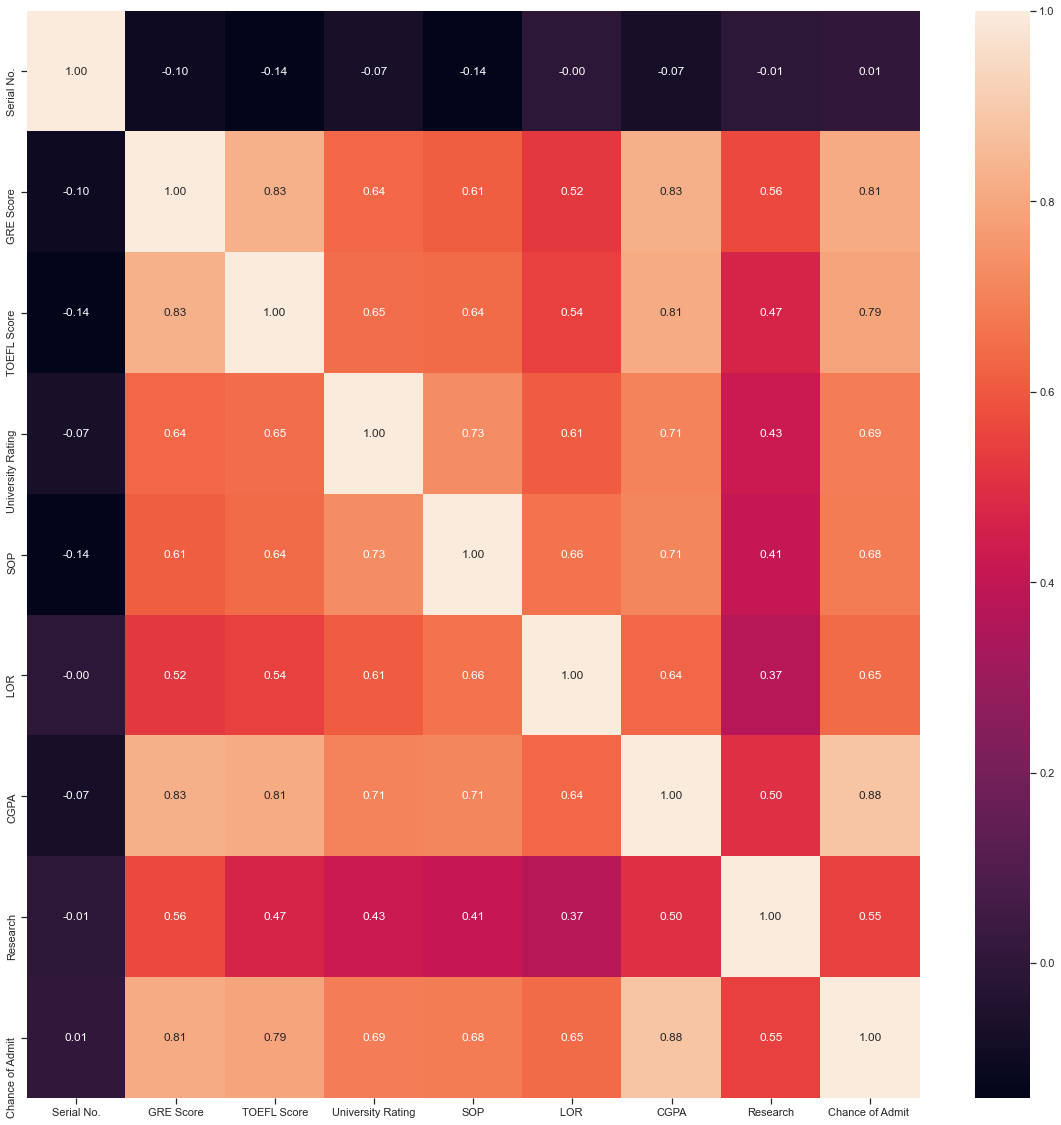

In [19]:
plt.figure(figsize=(20,20))
g = sns.heatmap(data.corr(), annot=True, fmt='.2f')

In [10]:


data_X = data.drop(columns='Chance of Admit ')
data_Y = data['Chance of Admit ']
data_X_train, data_X_test, data_Y_train, data_Y_test = train_test_split \
(data_X, data_Y, test_size = 0.3, random_state = 1)

# Обучение и тестирование моделей 

## Обучение и тестирование машины опорных векторов

In [20]:

model_svr = LinearSVR(C=1.0, max_iter=10000)
model_svr.fit(data_X_train, data_Y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVR(max_iter=10000)

In [21]:
Chance_of_Admit1 = model_svr.predict(data_X_test)
mean_squared_error(data_Y_test, Chance_of_Admit1), mean_absolute_error(data_Y_test, Chance_of_Admit1)

(0.00765204553096764, 0.0701535886054262)

## Обучение и тестирование градиентного бустинга  

In [17]:
# Важность признаков
gr_boost = GradientBoostingRegressor(random_state=1)
gr_boost.fit(data_X_train, data_Y_train)
Chance_of_Admit2 = gr_boost.predict(data_X_test)
mean_squared_error(data_Y_test, Chance_of_Admit2), mean_absolute_error(data_Y_test, Chance_of_Admit2)

(0.0028758822798431536, 0.036214972892178315)

# Выводы 

В РК были использованы метрики MAE, MSE
MAE и MSE помогают определить точность регрессии - среднее отклонение и дисперсию.

Метод градиентного бустинга показал себя гораздо лучше в сравнении с методом опорных
векторов. Высокая эффективность градиентного бустинга в данном примере обуславливается тем, что выбранный 
датасет содержит много сложных зависимостей.
